In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import pickle
from keras.utils import np_utils

# Any results you write to the current directory are saved as output.

['data_batch_1', 'data_batch_5', 'test_batch', 'data_batch_2', 'batches.meta', 'data_batch_3', 'data_batch_4']


In [2]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [3]:
batch1,label1=load_cfar10_batch('../input/',1)
batch2,label2=load_cfar10_batch('../input/',2)
batch3,label3=load_cfar10_batch('../input/',3)
batch4,label4=load_cfar10_batch('../input/',4)
batch5,label5=load_cfar10_batch('../input/',5)

In [30]:
X_train=np.append(batch1[0:8000],batch2[0:8000],axis=0)
X_train=np.append(X_train,batch3[0:8000],axis=0)
X_train=np.append(X_train,batch4[0:8000],axis=0)
X_train=np.append(X_train,batch5[0:8000],axis=0)

In [19]:
Y_train=np.append(label1[0:8000],label2[0:8000],axis=0)
Y_train=np.append(Y_train,label3[0:8000])
Y_train=np.append(Y_train,label4[0:8000])
Y_train=np.append(Y_train,label5[0:8000])

In [33]:
X_val=np.append(batch1[8001:9000],batch2[8001:9000],axis=0)
X_val=np.append(X_train,batch3[8001:9000],axis=0)
X_val=np.append(X_train,batch4[8001:9000],axis=0)
X_val=np.append(X_train,batch5[8001:9000],axis=0)

In [21]:
Y_val=np.append(label1[8001:9000],label2[8001:9000],axis=0)
Y_val=np.append(Y_train,label3[8001:9000])
Y_val=np.append(Y_train,label4[8001:9000])
Y_val=np.append(Y_train,label5[8001:9000])

In [32]:
X_test=np.append(batch1[9001:],batch2[9001:],axis=0)
X_test=np.append(X_train,batch3[9001:],axis=0)
X_test=np.append(X_train,batch4[9001:],axis=0)
X_test=np.append(X_train,batch5[9001:],axis=0)

In [23]:
Y_test=np.append(label1[9001:],label2[9001:],axis=0)
Y_test=np.append(Y_train,label3[9001:])
Y_test=np.append(Y_train,label4[9001:])
Y_test=np.append(Y_train,label5[9001:])

In [26]:
Y_train_one_hot = np_utils.to_categorical(Y_train, 10)
Y_validation_one_hot = np_utils.to_categorical(Y_val, 10)
Y_test_one_hot = np_utils.to_categorical(Y_test, 10)

In [34]:
X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0,2,3,1)
X_val = X_val.reshape((len(X_val), 3, 32, 32)).transpose(0,2,3,1)
X_test = X_test.reshape((len(X_test), 3, 32, 32)).transpose(0,2,3,1)

In [35]:
X_train.shape

(40000, 32, 32, 3)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation,Dropout,MaxPooling2D,BatchNormalization,Flatten,Dense

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',border_mode='same',bias='True'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],lea)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same", use_bias="True")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
__________

In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1./255)

train_data=train_data_gen.flow(X_train,Y_train_one_hot,batch_size=32)
val_data=train_data_gen.flow(X_val,Y_validation_one_hot,batch_size=32)
test_data=train_data_gen.flow(X_test,Y_test_one_hot,batch_size=32)


In [45]:
model.fit_generator(generator=train_data,
                    epochs=10,
                    validation_data=val_data,
                    steps_per_epoch=40000,
                    validation_steps=5000,
                    shuffle=True)

Epoch 1/10
40000/40000 [==============================] - 640s 16ms/step - loss: 1.2662 - acc: 0.5462 - val_loss: 0.9082 - val_acc: 0.6812
Epoch 2/10
40000/40000 [==============================] - 645s 16ms/step - loss: 0.9986 - acc: 0.6427 - val_loss: 0.7009 - val_acc: 0.7626
Epoch 3/10
40000/40000 [==============================] - 644s 16ms/step - loss: 0.9177 - acc: 0.6711 - val_loss: 0.6517 - val_acc: 0.7803
Epoch 4/10
40000/40000 [==============================] - 644s 16ms/step - loss: 0.8713 - acc: 0.6879 - val_loss: 0.5373 - val_acc: 0.8279
Epoch 5/10
40000/40000 [==============================] - 644s 16ms/step - loss: 0.8419 - acc: 0.6978 - val_loss: 0.5320 - val_acc: 0.8302
Epoch 6/10
40000/40000 [==============================] - 645s 16ms/step - loss: 0.8190 - acc: 0.7060 - val_loss: 0.5277 - val_acc: 0.8263
Epoch 7/10
40000/40000 [==============================] - 647s 16ms/step - loss: 0.8020 - acc: 0.7122 - val_loss: 0.4498 - val_acc: 0.8638
Epoch 8/10
40000/40000 [===

In [46]:
model.save('cifar10.h5')

In [48]:
history=model.history

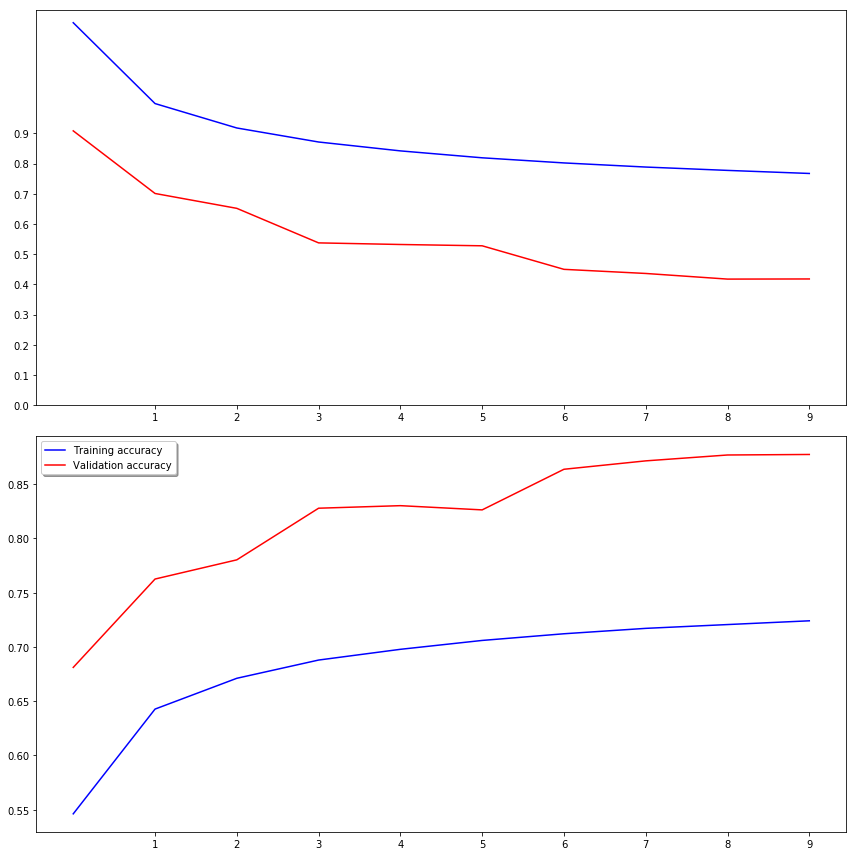

In [52]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [66]:
predict=model.predict(X_test)

In [67]:
predict=np.argmax(predict, axis=1, out=None)

In [73]:
predict

array([3, 9, 7, ..., 9, 9, 0])

In [72]:
Y_test

array([6, 9, 9, ..., 9, 1, 1])

In [77]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
def show_test(number):
    fig = plt.figure(figsize = (15,8))
    test_image = np.expand_dims(X_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(X_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {}, Actual: {}".format(labels[dict_key], labels[Y_test[number]]))

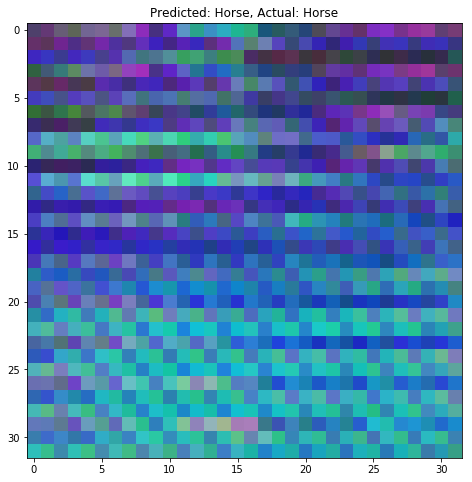

In [84]:
show_test(2502)

In [81]:
X_test = (X_test)*1./255 
scores = model.evaluate(X_test, Y_test_one_hot, batch_size=32)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

40999/40999 [==============================] - 5s 131us/step

Test result: 87.707 loss: 0.420
